## Introduction 
In this notebook we will see how to use OpenCV and Python to apply thresholding to an image.

If you want to learn all the concepts related to image thresholding using OpenCV, then you [this](https://learnopencv.com/opencv-threshold-python-cpp/) post on [LearnOpenCV](https://learnopencv.com/opencv-threshold-python-cpp/).

## Download and Read the Image

In [61]:
import requests
url = "https://raw.githubusercontent.com/spmallick/learnopencv/master/Threshold/threshold.png"
r = requests.get(url)
with open('image.jpg', 'wb') as f:
    f.write(r.content)

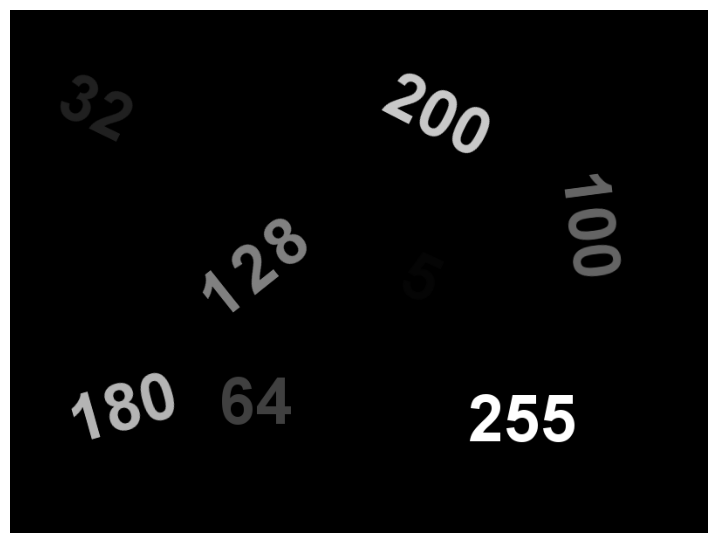

In [62]:
import cv2
import matplotlib.pyplot as plt

from pylab import rcParams
rcParams['figure.figsize'] = 9, 7

im_bgr = cv2.imread('image.jpg')
plt.imshow(im_bgr[:, :, ::-1])
plt.axis('off')
plt.show()

We will be using the above image for applying OpenCV's image thresholding. **Also, to apply thresholding, we first need to convert the image to grayscale format**.

(600, 800)


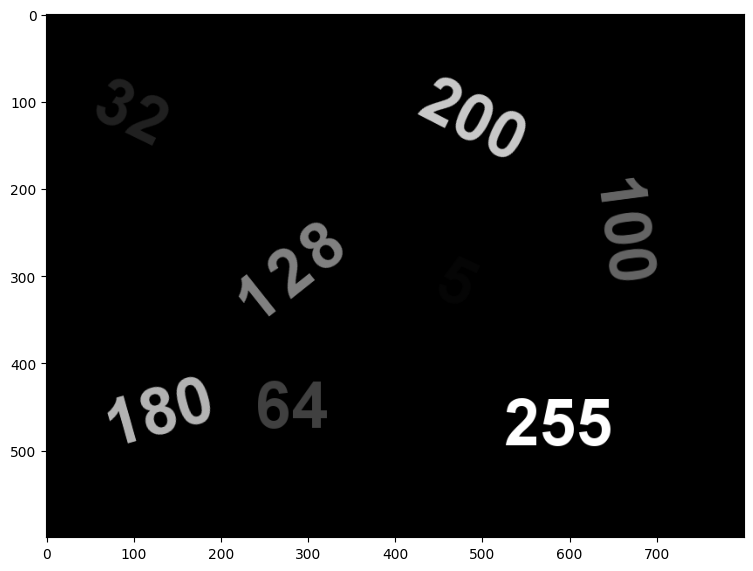

In [63]:
img_gr = cv2.cvtColor(im_bgr, cv2.COLOR_BGR2GRAY)
print(img_gr.shape)
plt.imshow(img_gr, cmap='gray')
# print the color bar
# plt.colorbar()
plt.show()

## Binary Thresholding

In simple binary thresholding, any source pixel value that is above the threshold will be set to `maxValue`, and the other pixels will be set to 0.

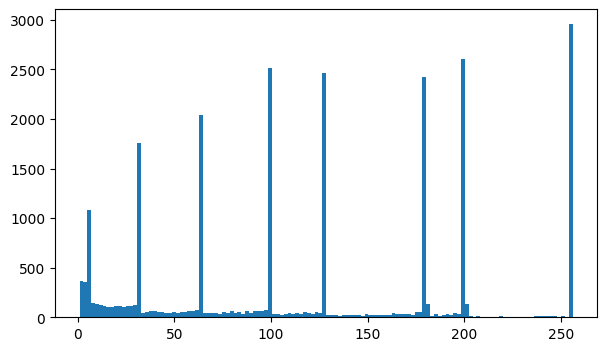

In [64]:
# make a histogram of the image
plt.figure(figsize=(7, 4))
plt.hist(img_gr.ravel(), 128, [1, 256]) # ravel flattens the array / excluded 0 (big count, out of range)
plt.show()

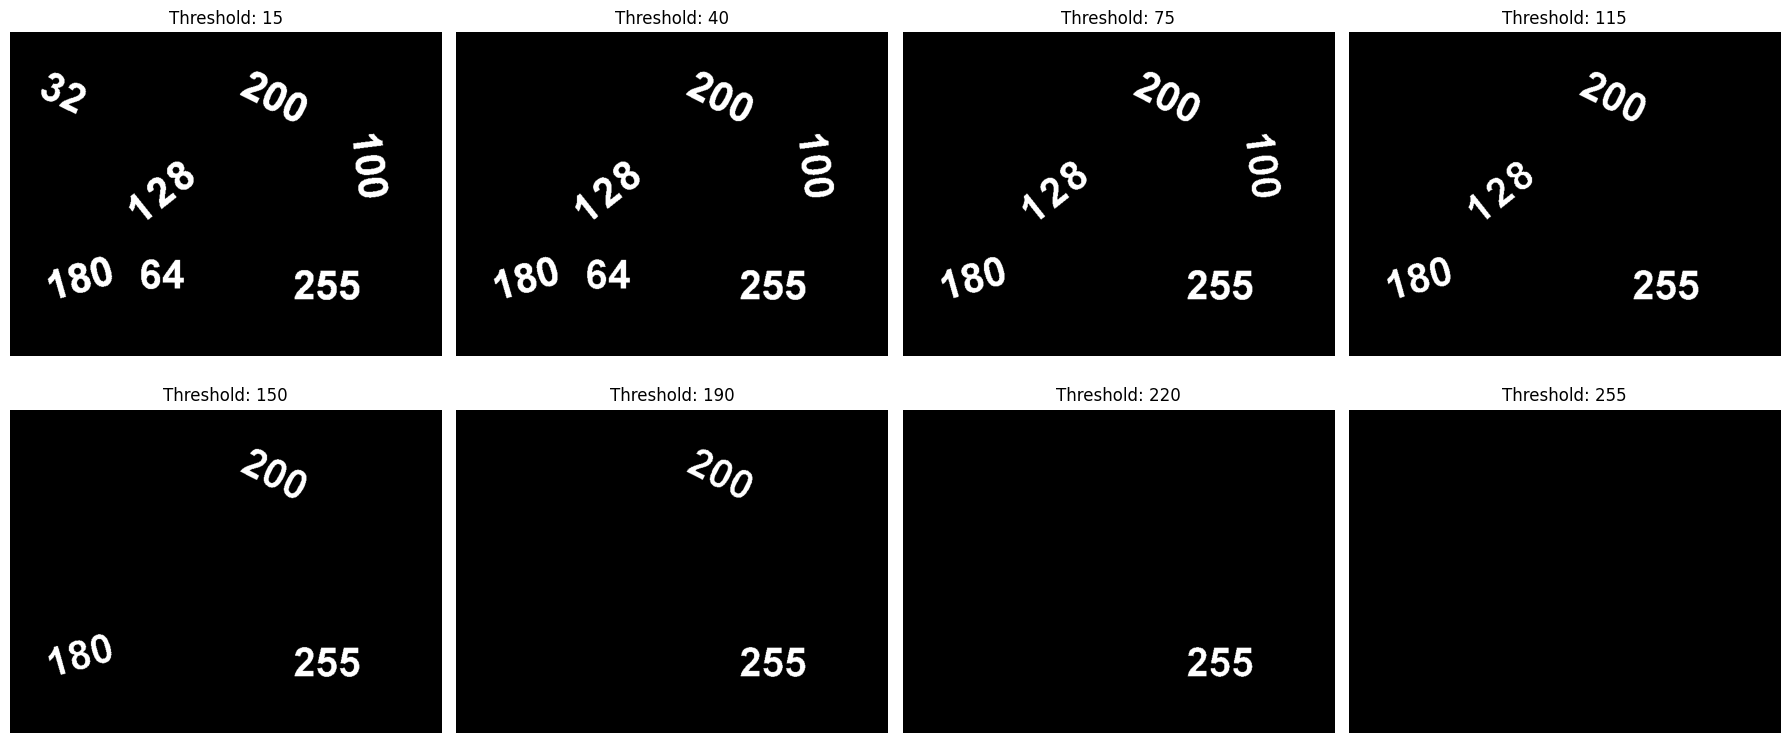

In [65]:
# MAV EXPERIMENT
ths = [15, 40, 75, 115, 150, 190, 220, 255]

plt.figure(figsize=(18, 8))
plt.subplot(2, 4, 1)
for i in range (0, len(ths)):
    plt.subplot(2, 4, i+1)
    plt.title('Threshold: ' + str(ths[i]))
    plt.imshow(cv2.threshold(img_gr, ths[i], 255, cv2.THRESH_BINARY)[1], cmap='gray')
    plt.axis('off')

plt.tight_layout()
plt.show()

0.0


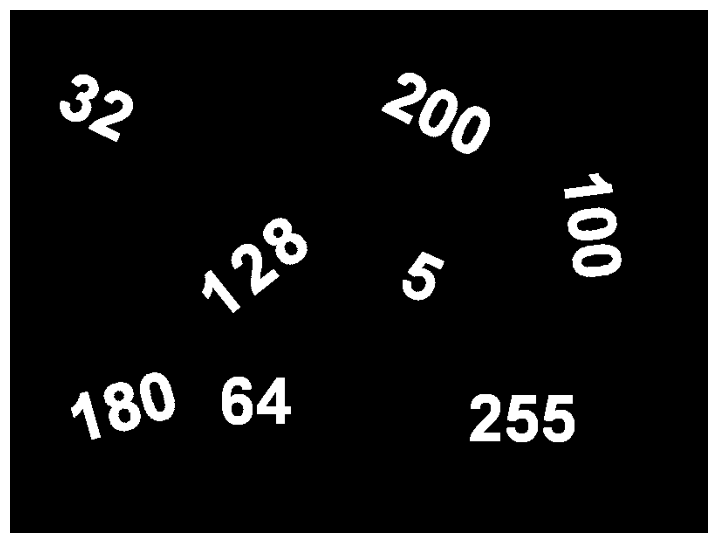

In [66]:
# set threshold and maxValue
thresh = 0
maxValue = 255

# basic threshold example
th, dst = cv2.threshold(img_gr, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')
plt.axis('off')
print(th)
plt.show()

Let's change the threshold value and see how it affects the resulting image.

127.0


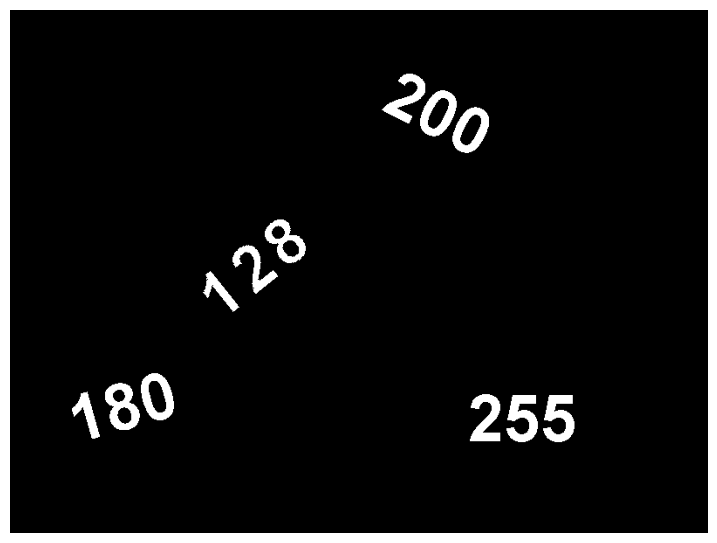

In [67]:
# set threshold and maxValue
thresh = 127
maxValue = 255 

# basic threshold example
th, dst = cv2.threshold(img_gr, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(dst, cmap='gray')
plt.axis('off')
print(th)
plt.show()

## Inverse Binary Thresholding

Inverse binary thresholding is just the opposite of binary thresholding. The destination pixel is set to zero if the corresponding source pixel is greater than the threshold, and to maxValue, if the source pixel is less than the threshold.

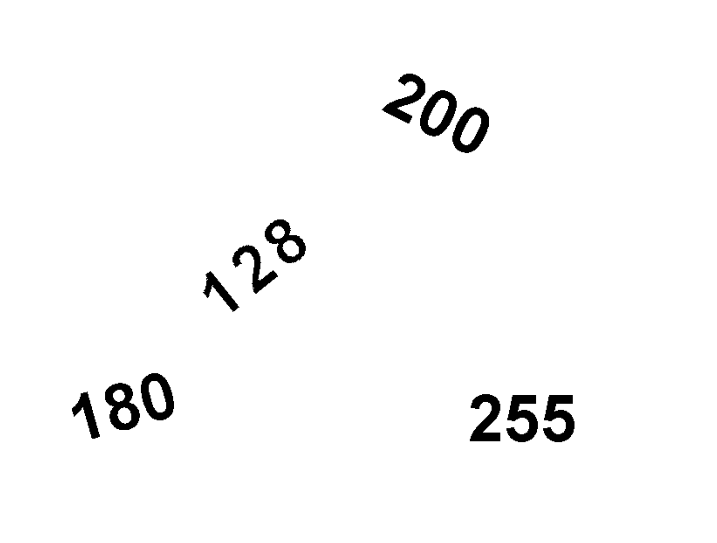

In [68]:
# set threshold and maxValue
thresh = 127
maxValue = 255 

th, dst = cv2.threshold(img_gr, thresh, maxValue, cv2.THRESH_BINARY_INV);
plt.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()

## Truncate Thresholding

In this case, the destination pixel is set to the threshold (`thresh`) if the source pixel value is greater than the threshold. Otherwise, it is set to the source pixel value. Here, the `maxValue` argument is ignored.

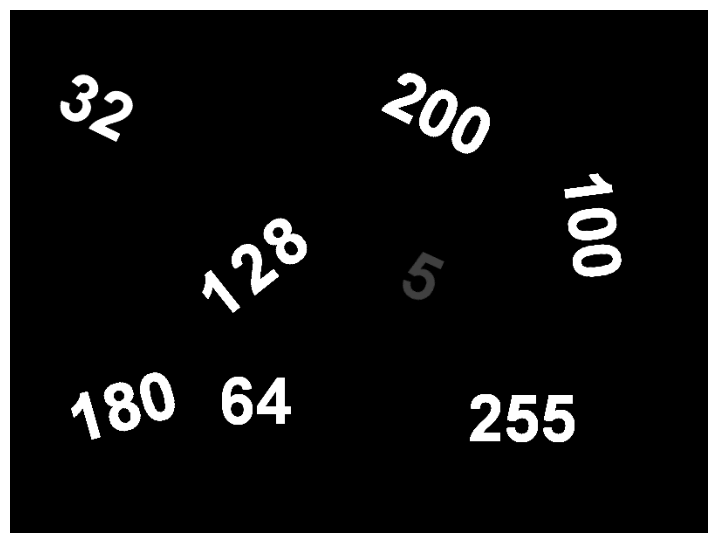

In [73]:
# set threshold and maxValue
thresh = 20
maxValue = 255 

th, dst = cv2.threshold(img_gr, thresh, maxValue, cv2.THRESH_TRUNC)
plt.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()

## Threshold to Zero

In **Threshold to Zero**, the destination pixel value is set to the corresponding source pixel value if the source pixel value is greater than the threshold. Otherwise, it is set to zero. Here, the `maxValue` argument is ignored.

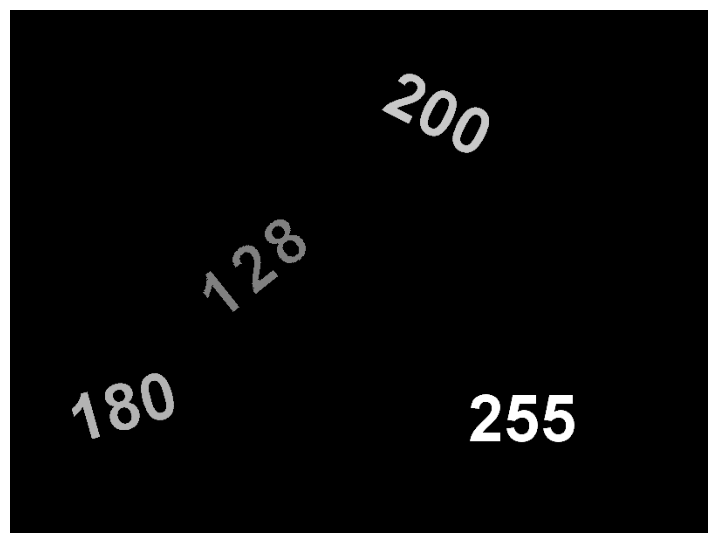

In [ ]:
# set threshold and maxValue
thresh = 127
maxValue = 255 

th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO);
plt.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()

## Inverted Threshold to Zero

In **Inverted Threshold to Zero**,  the destination pixel value is set to zero if the source pixel value is greater than the threshold. Otherwise, it is set to the source pixel value. Here, the `maxValue` argument is ignored.

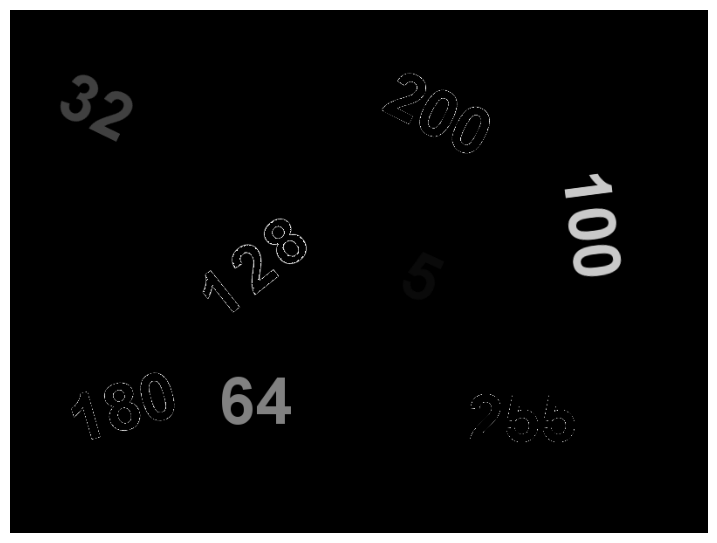

In [ ]:
# set threshold and maxValue
thresh = 127
maxValue = 255 

th, dst = cv2.threshold(image, thresh, maxValue, cv2.THRESH_TOZERO_INV);
plt.imshow(dst, cmap='gray')
plt.axis('off')
plt.show()